In [1]:
#IMPORTAMOS LAS LIBRERIAS NECESARIAS
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#LEEMOS Y MOSTRAMOS EL DATASET
df = pd.read_excel('IGP_datos_sismicos.xlsx')
df.head()

,fecha UTC,hora UTC,latitud (º),longitud (º),profundidad (km),magnitud (M)
0,03/01/2000,15:31:50.00,-3.4338,-80.8235,18,4.6
1,06/01/2000,21:37:46.00,-18.4571,-69.5785,86,5.0
2,10/01/2000,17:56:36.00,-11.5475,-78.0705,16,4.6
3,11/01/2000,13:41:39.00,-15.8069,-74.9605,44,4.5
4,12/01/2000,13:35:30.00,-7.2811,-79.8015,51,4.5


In [3]:
#MOSTRAMOS LA INFORMACION DEL DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15101 entries, 0 to 15100
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fecha UTC         15101 non-null  object 
 1   hora UTC          15101 non-null  object 
 2   latitud (º)       15101 non-null  float64
 3   longitud (º)      15101 non-null  float64
 4   profundidad (km)  15101 non-null  int64  
 5   magnitud (M)      15101 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 708.0+ KB


In [4]:
#MOSTRAMOS UN RESUMEN ESTADISTICO DEL DATASET
df.describe()

,latitud (º),longitud (º),profundidad (km),magnitud (M)
count,15101.000000,15101.000000,15101.000000,15101.000000
mean,-11.451317,-75.561023,72.780213,4.629210
std,4.633943,3.214656,66.084832,0.427963
min,-23.397100,-82.893700,0.000000,3.000000
25%,-15.660400,-77.787400,29.000000,4.500000
50%,-11.886500,-75.586500,49.000000,4.600000
75%,-7.760200,-73.100100,112.000000,4.800000
max,-1.490000,-66.980700,743.000000,8.400000


In [5]:
-#MOSTRAMOS LOS VALORES NULOS DE LAS COLUMNAS
df.isnull().sum()

fecha UTC           0
hora UTC            0
latitud (º)         0
longitud (º)        0
profundidad (km)    0
magnitud (M)        0
dtype: int64

In [6]:
#PASAMOS AL FORMATO ADECUADO LAS COLUMNAS DE FECHA Y HORA
df['fecha UTC'] = pd.to_datetime(df['fecha UTC'], format= '%d/%m/%Y')
df['hora UTC'] = pd.to_datetime( df['hora UTC'])

C:\Users\CarpeDiem\AppData\Local\Temp\ipykernel_13552\3845156221.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hora UTC'] = pd.to_datetime( df['hora UTC'])


In [7]:
df['hora UTC'] = df['hora UTC'].dt.time

In [8]:
#MOSTRAMOS NUEVAMENTE LA INFORMACION DE L DATASET CON EL CAMBIO HECHO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15101 entries, 0 to 15100
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha UTC         15101 non-null  datetime64[ns]
 1   hora UTC          15101 non-null  object        
 2   latitud (º)       15101 non-null  float64       
 3   longitud (º)      15101 non-null  float64       
 4   profundidad (km)  15101 non-null  int64         
 5   magnitud (M)      15101 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 708.0+ KB


In [9]:
#MOSTRAMOS 4 DATOS RANDOM
df.sample(4)

,fecha UTC,hora UTC,latitud (º),longitud (º),profundidad (km),magnitud (M)
6654,2012-10-16,07:33:59,-8.6266,-75.6043,163,4.8
14970,2023-10-01,08:59:02,-4.0100,-80.6500,32,4.1
2716,2005-08-28,10:01:04,-15.2659,-72.2675,139,4.9
2922,2005-11-27,08:45:09,-14.1435,-76.3630,17,5.2


#VISUALIZACION DE LOS DATOS

##hacemos una especie de comparacion entre las librerias de matplotlib y plotly

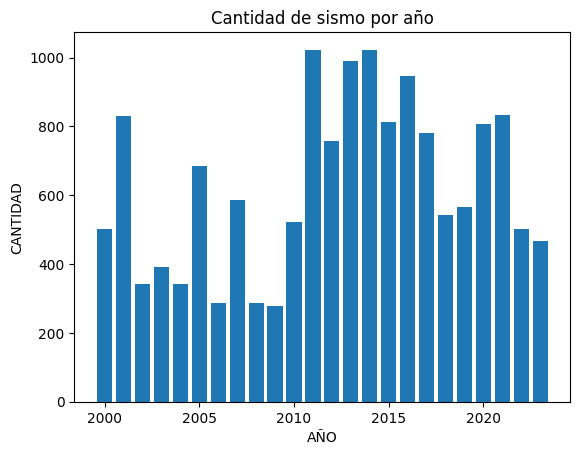

In [11]:
#MATPLOTLIB
#GRAFICOS DE BARRAS
fig, ax = plt.subplots()

ax.bar(df['fecha UTC'].dt.year.value_counts().index, df['fecha UTC'].dt.year.value_counts().values)
ax.set_ylabel('CANTIDAD')
ax.set_xlabel('AÑO')
ax.set_title('Cantidad de sismo por año')
plt.show()

In [12]:
#PLOTLY
#GRAFICA DE BARRAS
fig = px.bar(df, x = df['fecha UTC'].dt.year.value_counts().index, y = df['fecha UTC'].dt.year.value_counts().values, title = 'Cantidad de sismos por año', labels={'x':'año', 'y': 'cantidad'})

fig.show()

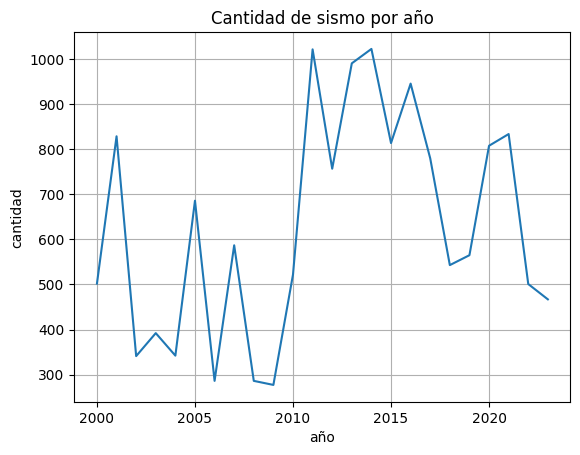

In [13]:
#MATPLOTLIB
#GRAFICO DE LINEAS
fig, ax = plt.subplots()
ax.plot( df['fecha UTC'].dt.year.value_counts().sort_index().index, df['fecha UTC'].dt.year.value_counts().sort_index().values )
ax.set_title('Cantidad de sismo por año')
ax.set_xlabel('año')
ax.set_ylabel('cantidad')
ax.grid()

plt.show()

In [14]:
#PLOTLY
#GRAFICOS DE LINEA
fig = px.line(df,x = df['fecha UTC'].dt.year.value_counts().sort_index().index, y = df['fecha UTC'].dt.year.value_counts().sort_index().values, labels = {'x': 'año', 'y': 'cantidad'},
              title = 'Cantidad de sismo por año', text = df['fecha UTC'].dt.year.value_counts().sort_index().index, markers = True )

fig.show()

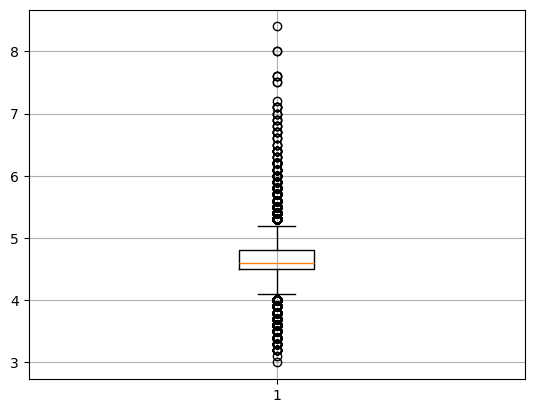

In [15]:
#MATPLOLIB
#GRAFICA DE CAJAS
fig, ax = plt.subplots()
ax.boxplot(df['magnitud (M)'])
ax.grid()

plt.show()

In [16]:
#PLOTLY
#GRAFICO DE CAJA
fig = px.box(df, y = df['magnitud (M)'], hover_data=['fecha UTC'])

fig.show()

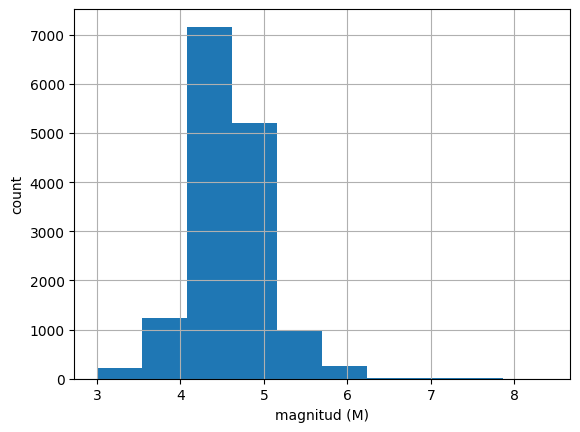

In [17]:
#MATPLOTLIB
#GRAFICO DE HISTOGRAMAS
fig, ax = plt.subplots()
ax.hist(df['magnitud (M)'])
ax.set_xlabel('magnitud (M)')
ax.set_ylabel('count')

ax.grid()

plt.show()

In [18]:
#PLOTLY
#GRAFICOS DE HISTOGRMAS
fig = px.histogram(df, x = df['magnitud (M)'], title = 'Histograma de las magnitudes (M)')

fig.show()

In [19]:
#CREAMOS UN DATASET FILTRADO
soli = df[df['fecha UTC'].dt.year == 2023]

In [20]:
#PLOTLY
#HACEMOS UN GRAFICO DE MAPA PARA VER TODOS LOS SISMO OCURRIDO EN EL 2023
fig = px.scatter_mapbox(soli, lat = 'latitud (º)', lon = 'longitud (º)', title = 'Sismos en el Perú(2023)',mapbox_style="open-street-map", hover_data = ['magnitud (M)', 'profundidad (km)', 'fecha UTC'])

fig.show()